In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(1337, 7)

# Exploratory Data Analysis

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [22]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


# Age

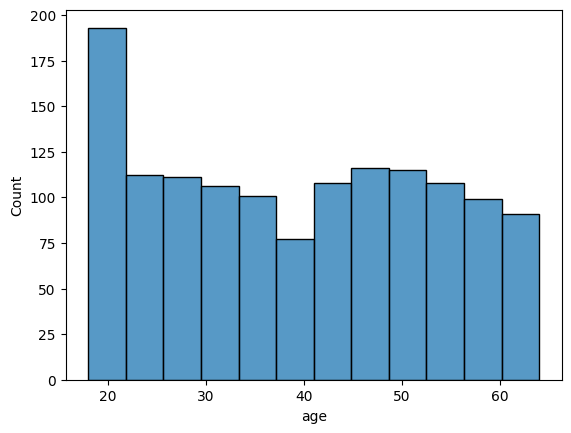

In [23]:
sns.histplot(df['age'])
plt.show()

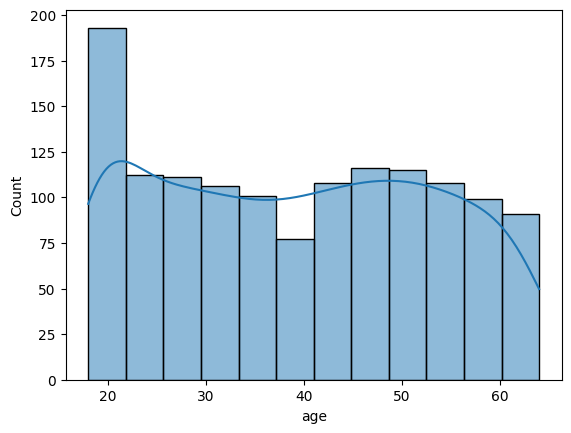

In [24]:
sns.histplot(df['age'], kde=True)
plt.show()

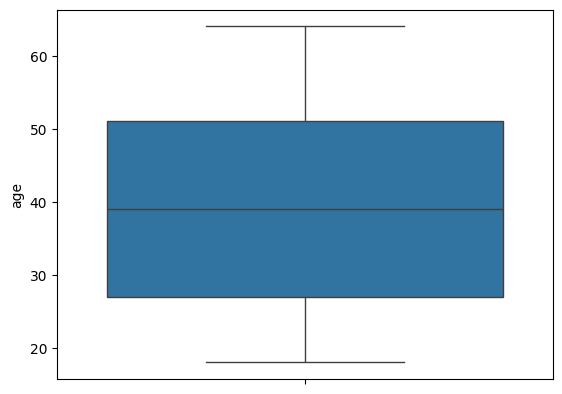

In [26]:
sns.boxplot(df['age'])
plt.show()

* The minimum age is 18 and maximum age is 64
* There are no outliers in the age column

# Sex

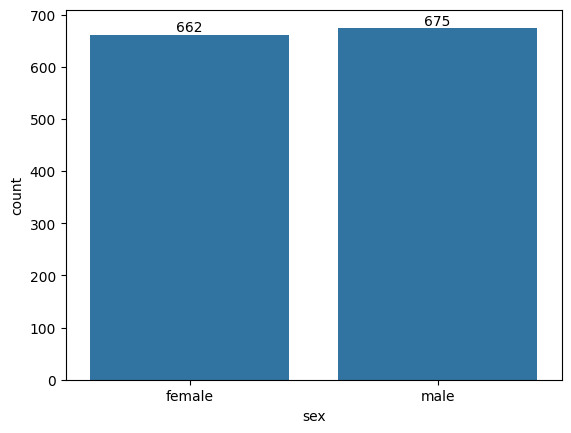

In [28]:
ax = sns.countplot(x=df['sex'], data=df)
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

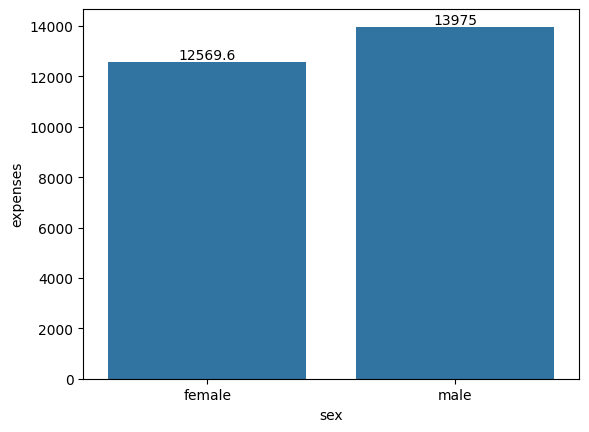

In [32]:
ax = sns.barplot(x=df['sex'], y=df['expenses'], data=df, errorbar=None)
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

* Males are 675 & females are 662
* and males also have high expenses males(13975) while females(12569)

# BMI

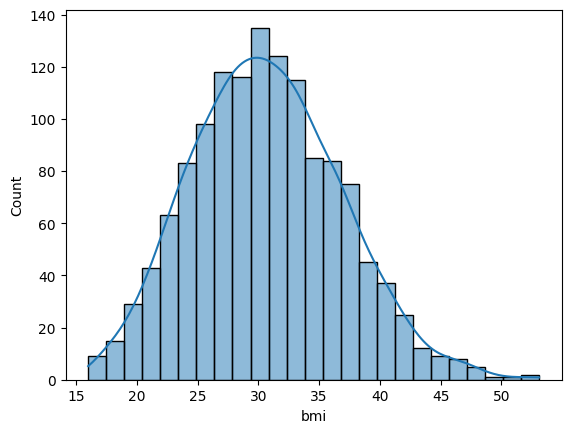

In [34]:
sns.histplot(df['bmi'], kde=True)
plt.show()

# Children

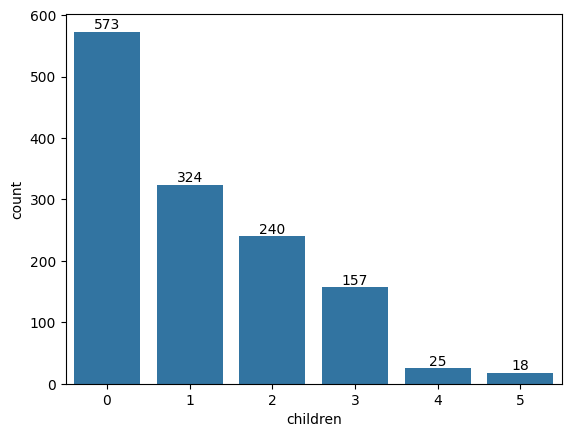

In [40]:
ax = sns.countplot(x=df['children'])
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

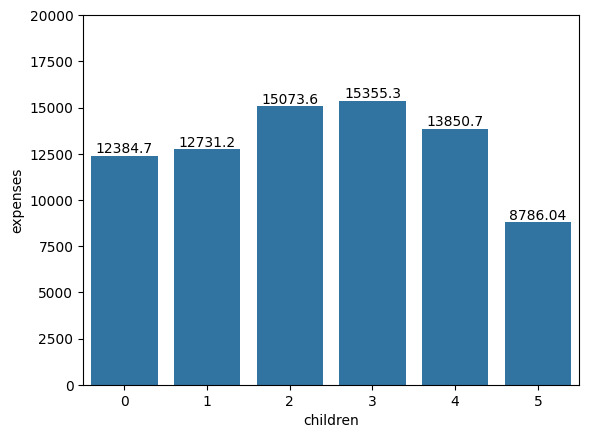

In [44]:
# children & expenses

ax = sns.barplot(x=df['children'], y=df['expenses'], data=df, errorbar=None)
for bars in ax.containers:
    ax.bar_label(bars)

plt.ylim(0,20000)
plt.show()

# Smoker

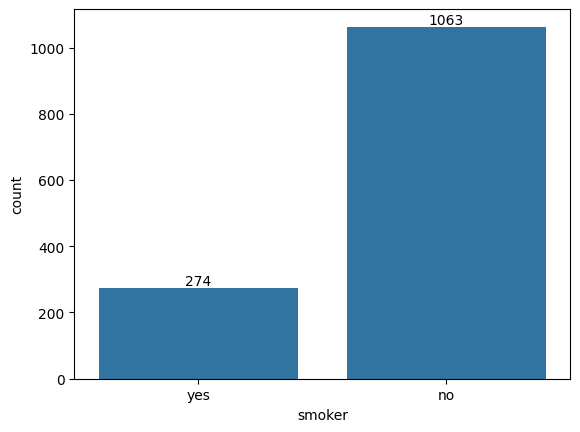

In [45]:
ax = sns.countplot(x=df['smoker'])
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

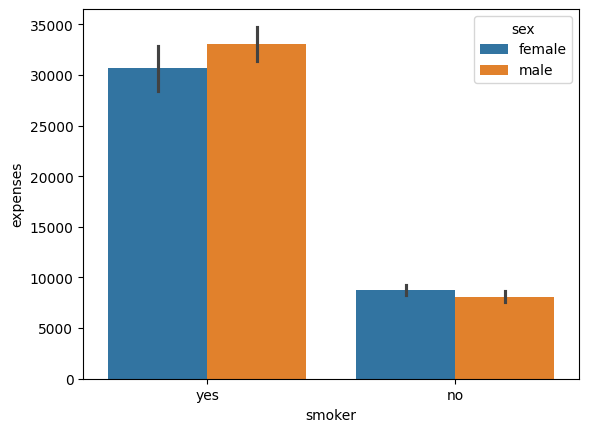

In [46]:
# smoker by sex & expenses

sns.barplot(x=df['smoker'], y=df['expenses'], data=df, hue='sex')
plt.show()

* Smokers are 274 while non smokers are 1063
* Males are more smoke than females and also smokers have high expenses than non smokers 

# Region

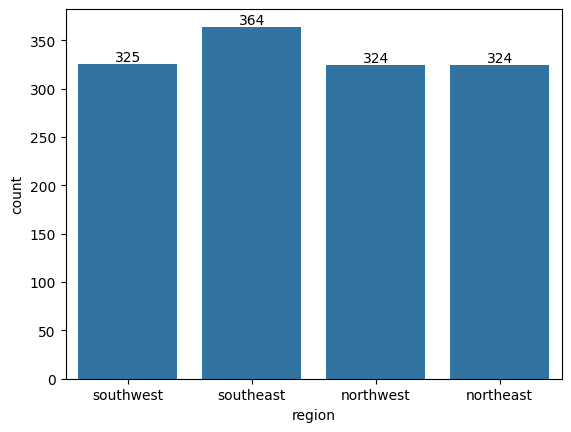

In [47]:
ax = sns.countplot(x=df['region'])
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

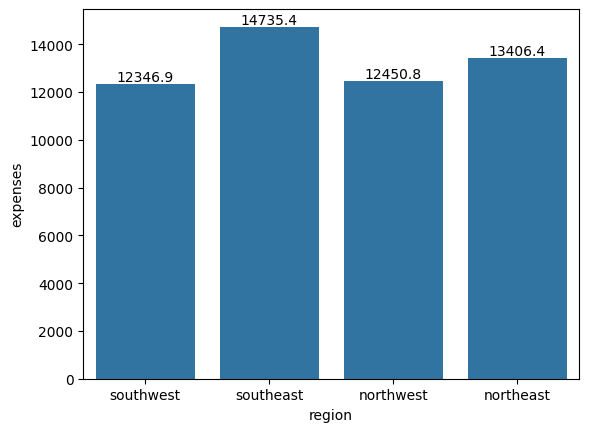

In [48]:
ax = sns.barplot(x=df['region'], y=df['expenses'], data=df, errorbar=None)
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

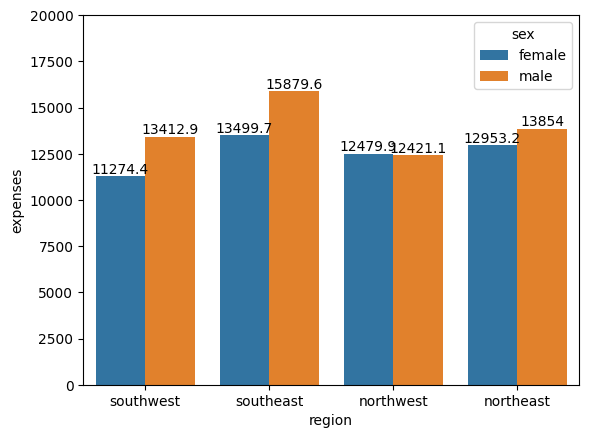

In [51]:
# region with sex & expenses

ax = sns.barplot(x=df['region'], y=df['expenses'], data=df, hue='sex', errorbar=None)
for bars in ax.containers:
    ax.bar_label(bars) 
    
plt.ylim(0,20000)
plt.show()

* Southeast has the highest number of people 364 & expenses are also higher 

# Expenses

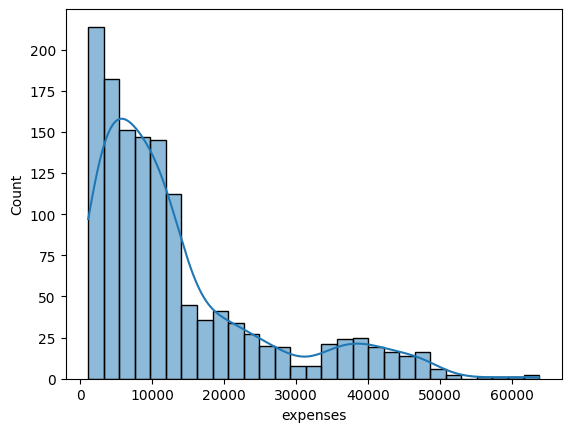

In [52]:
sns.histplot(df['expenses'], kde=True)
plt.show()

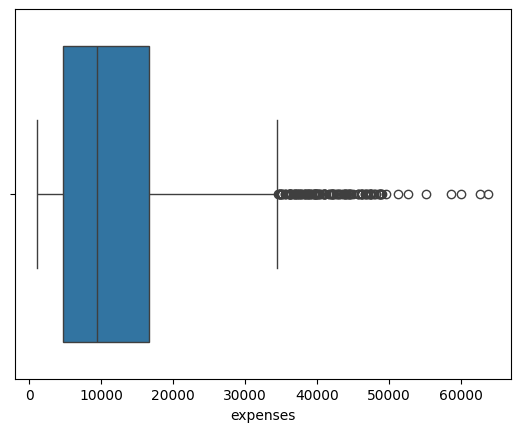

In [53]:
sns.boxplot(x=df['expenses'])
plt.show()

* The Boxplot shows that there are some outliers in this columns

In [54]:
corr_matrix=df[['age', 'bmi', 'children', 'expenses']].corr()
corr_matrix

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


<Axes: >

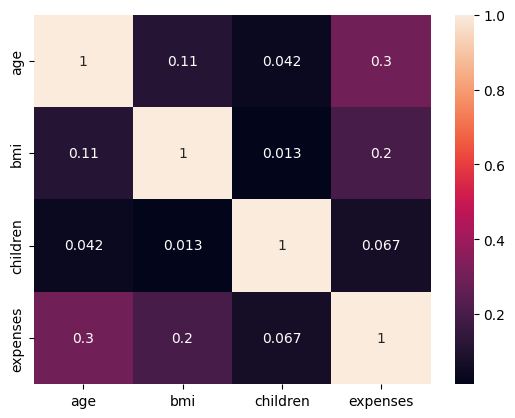

In [55]:
sns.heatmap(corr_matrix, annot=True)